<a href="https://colab.research.google.com/github/joweeeee09/SC1015-Introduction-to-Data-Science-and-Artificial-Intelligence/blob/main/SC1015_A140_Team2_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC1015 A140 Team 2
# Team members:
## Park Jihae
## Ang Jo Wee
## Leong Mininn Miko
# Mini Project - Mushroom Classification
# Dataset:
## https://www.kaggle.com/datasets/uciml/mushroom-classification

## Problem Statement
Mushroom hunting, or "shrooming", has become increasingly popular as a recreational activity. However, correctly identifying edible mushrooms from poisonous ones can be challenging, even for experienced mushroom hunters. This poses a risk to the safety of mushroom hunters and their companions, as well as the general public if contaminated mushrooms are consumed.

The goal of this project is to develop an accurate and reliable machine learning model for mushroom classification that classifies edibile and poisonous mushrooms, enhancing the safety of mushroom hunting activities.

We would like to find out using which learning algorithm will create the most accurate model. We are comparing 3 models:
- Logistic Regression
- Random Forest
- Support Vector Machines (SVM)

## Import Warnings

In [ ]:
# Suppress Future Warnings
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [ ]:
# Importing required libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import platform
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version = {}".format(sklearn.__version__))
print("Numpy version = {} ".format(np.__version__))
print("Pandas version = {}".format(pd.__version__))
print("Matplotlib version = {}".format(matplotlib.__version__))
print("Python version = {}".format(platform.python_version()))
print("Seaborn version = {}".format(sns.__version__))

************************
        Versions        
************************
Scikit-learn version = 1.2.2
Numpy version = 1.22.4 
Pandas version = 1.5.3
Matplotlib version = 3.7.1
Python version = 3.9.16
Seaborn version = 0.12.2


## Data Importing: data.csv

In [ ]:
#df = the dataset file for csv
#read the csv/import the csv file

df = pd.read_csv("/content/data.csv")

#Successfully loaded notess
print("Loaded successfully.")
print()

# print first 5 rows of data.csv
df.head()

Loaded successfully.



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Attribute Information:
- classes: edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## For stalk-root column, replace '?' property with 'm' for clarity

In [ ]:
df["stalk-root"].tail()

8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, dtype: object

In [ ]:
# Replace all "?" values in the "stalk-root" column with "m"
df["stalk-root"] = df["stalk-root"].replace("?", "m")

# Save the modified dataset to a new CSV file
df.to_csv("data.csv", index=False)

In [ ]:
df["stalk-root"].tail()

8119    m
8120    m
8121    m
8122    m
8123    m
Name: stalk-root, dtype: object

In [ ]:
## data.csv

#Get the shape
print("Shape of data.csv:")
print(df.shape)
print()

#Get the infomation
print("summary of data.csv:")
df.info()
print()

#Get statistical summary
print("Statistical summary of data.csv:")
df.describe()

Shape of data.csv:
(8124, 23)

summary of data.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Check for any duplicated or missing values

In [ ]:
# Sort out columns by datatype:object (To see the columns better)
isobject = list(df.columns[df.dtypes == "object"])
notobject = list(df.columns[df.dtypes != "object"])
print("List of columns with object datatype: ", isobject)
print()
print("List of columns without object datatype: ", notobject)
print()

# Check for duplicated values
repeatdf = df[df.duplicated()]
print('For duplicated data.csv:', repeatdf)
#'Empty DataFrame': No duplicated data

# List out all variables with nulls/missing values
print("Variables with missing values count: ")
df.isnull().sum()

List of columns with object datatype:  ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

List of columns without object datatype:  []

For duplicated data.csv: Empty DataFrame
Columns: [class, cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population, habitat]
Index: []

[0 rows x 23 columns]
Variables with missing values count: 


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Converting categorical columns in a DataFrame to numerical columns using one-hot encoding

In [ ]:
# get one-hot encoded columns for categorical features
cat_columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
               'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
               'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
               'stalk-surface-below-ring', 'stalk-color-above-ring',
               'stalk-color-below-ring', 'veil-type', 'veil-color',
               'ring-number', 'ring-type', 'spore-print-color',
               'population', 'habitat']
df_encoded = pd.get_dummies(df, columns=cat_columns)

# print the resulting DataFrame
print(df_encoded.head())

  class  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0     p            0            0            0            0            0   
1     e            0            0            0            0            0   
2     e            1            0            0            0            0   
3     p            0            0            0            0            0   
4     e            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  ...  \
0            1              0              0              1  ...   
1            1              0              0              1  ...   
2            0              0              0              1  ...   
3            1              0              0              0  ...   
4            1              0              0              1  ...   

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0             1             0             0          0

## Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split
y = df_encoded["class"].values
X = df_encoded.drop(["class"],axis=1).values
y = pd.DataFrame(y)
X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (5686, 117) (5686, 1)
Test Set  : (2438, 117) (2438, 1)


## Recursive Feature Elimination (RFE) using Logistic Regression to find common features of poisonous mushroom

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from collections import defaultdict

y = df_encoded['class'].map({'p': 1, 'e': 0})

# Create RFE objects with different estimators
lr = LogisticRegression(max_iter=1000)

rfe_lr = RFE(estimator=lr, n_features_to_select=20, step=1)

common_features_freq = defaultdict(int)

# Repeated RFE 35 times for CLT.
for i in range(35):
    # Fit RFE objects on the data
    rfe_lr.fit(X, y)

    # Get the support mask for each RFE object
    support_lr = X.columns[rfe_lr.support_]

    # Find the common features for poisonous mushrooms
    poisonous_mask = (y == 1)
    common_features = support_lr[poisonous_mask[support_lr]].unique()

    # Update the frequency count for each common feature
    for feature in common_features:
        common_features_freq[feature] += 1

# Get the top common features
top_common_features = sorted(common_features_freq.items(), key=lambda x: x[1], reverse=True)[:5]


In [ ]:
print("Common features selected by RFE with LR model: ")
for i in  top_common_features:
  print(df_encoded.columns[i[0]])

Common features selected by RFE with LR model: 
odor_f
gill-size_n
stalk-color-below-ring_w


## Recursive Feature Elimination (RFE) using Random Forest to find common features of poisonous mushroom

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict

y = df_encoded['class'].map({'p': 1, 'e': 0})

# Create RFE objects with different estimators
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfe_rfc = RFE(estimator=rfc, n_features_to_select=20, step=1)

common_features_freq = defaultdict(int)

# Repeated RFE 35 times for CLT.
for i in range(35):
    # Fit RFE objects on the data
    rfe_rfc.fit(X, y)

    # Get the support mask for each RFE object
    support_rfc = X.columns[rfe_rfc.support_]

    # Find the common features for poisonous mushrooms
    poisonous_mask = (y == 1)
    common_features = support_rfc[poisonous_mask[support_rfc]].unique()

    # Update the frequency count for each common feature
    for feature in common_features:
        common_features_freq[feature] += 1

# Get the top common features
top_common_features = sorted(common_features_freq.items(), key=lambda x: x[1], reverse=True)[:5]


In [ ]:
print("Common features selected by RFE with Random Forest model: ")
for i in  top_common_features:
  print(df_encoded.columns[i[0]])

Common features selected by RFE with Random Forest model: 
bruises_f
gill-size_n
stalk-root_c


## Recursive Feature Elimination (RFE) using Support Vectors Machine to find common features of poisonous mushroom

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.svm import SVC, LinearSVC
from collections import defaultdict

y = df_encoded['class'].map({'p': 1, 'e': 0})

# Create RFE objects with different estimators
svm = SVC(kernel='linear', probability=True)

rfe_svm = RFE(estimator=svm, n_features_to_select=20, step=1)

common_features_freq = defaultdict(int)

# Repeated RFE 35 times for CLT.
for i in range(35):
    # Fit RFE objects on the data
    rfe_svm.fit(X, y)

    # Get the support mask for each RFE object
    support_svm = X.columns[rfe_svm.support_]

    # Find the common features for poisonous mushrooms
    poisonous_mask = (y == 1)
    common_features = support_svm[poisonous_mask[support_svm]].unique()

    # Update the frequency count for each common feature
    for feature in common_features:
        common_features_freq[feature] += 1

# Get the top common features
top_common_features = sorted(common_features_freq.items(), key=lambda x: x[1], reverse=True)[:5]

In [ ]:
print("Common features selected by RFE with SVM model: ")
for i in  top_common_features:
  print(df_encoded.columns[i[0]])

Common features selected by RFE with SVM model: 
odor_f


In summary,

Common features selected by RFE with LR model:
odor_f
gill-size_n
stalk-color-below-ring_w

Common features selected by RFE with Random Forest model:
bruises_f
gill-size_n
stalk-root_c

Common features selected by RFE with SVM model:
odor_f

The common feature selected by both RFE with LR, Random Forest, and SVM models is gill-size_n and odor_f (the closest common feature despite it was not found in SVM).

It's possible that the LR model and Random Forest model identified different features as important because they have different ways of evaluating feature importance.
The LR, Random Forest, and SVM models have different ways of selecting the best features. LR uses coefficients to identify the features that have the most impact on the target variable, while Random Forest builds multiple decision trees and selects the features that have the highest importance scores across all trees. SVM determines by comparing the size of svm coefficients to each other.

# Exploratory Data Analysis

## Crosstabulation table showing the frequency of the "edible" and "poisonous" class across different features of mushroom

In [ ]:
def get_highest_freq(df, col):
    ct = pd.crosstab(df['class'], df[col])
    max_e = ct.iloc[0].max()
    max_p = ct.iloc[1].max()
    freq_e = ct.idxmax(axis=1)['e']
    freq_p = ct.idxmax(axis=1)['p']
    print(ct)
    print("Highest frequency", col, "category for class e:", freq_e)
    print("Highest frequency", col, "category for class p:", freq_p)
    print()
    print()

In [ ]:
for col in df.select_dtypes(include=['object']):
  get_highest_freq(df, col)

class     e     p
class            
e      4208     0
p         0  3916
Highest frequency class category for class e: e
Highest frequency class category for class p: p


cap-shape    b  c     f    k   s     x
class                                 
e          404  0  1596  228  32  1948
p           48  4  1556  600   0  1708
Highest frequency cap-shape category for class e: x
Highest frequency cap-shape category for class p: x


cap-surface     f  g     s     y
class                           
e            1560  0  1144  1504
p             760  4  1412  1740
Highest frequency cap-surface category for class e: f
Highest frequency cap-surface category for class p: y


cap-color    b   c    e     g     n   p   r   u    w    y
class                                                    
e           48  32  624  1032  1264  56  16  16  720  400
p          120  12  876   808  1020  88   0   0  320  672
Highest frequency cap-color category for class e: n
Highest frequency cap-color category for c

# From the crosstabulation table we found the features with the highest frequecy for "edible" and "poisonous" class.

If a feature has the highest frequency for both e and p, it means that the feature is not a good predictor of the class. In this case, removing the feature may not have a significant impact on the prediction accuracy.

Therefore, it is better to consider features:

[cap-surface, bruises, odor, gill-size, gill-color, stalk-surface-above-ring, stalk-surface-below-ring, ring-type, spore-print-color]

during classification and ignore all other features.



## Bar plot & heatmap combined to compare the distribution of poisonous mushroom for each features, and find top features.

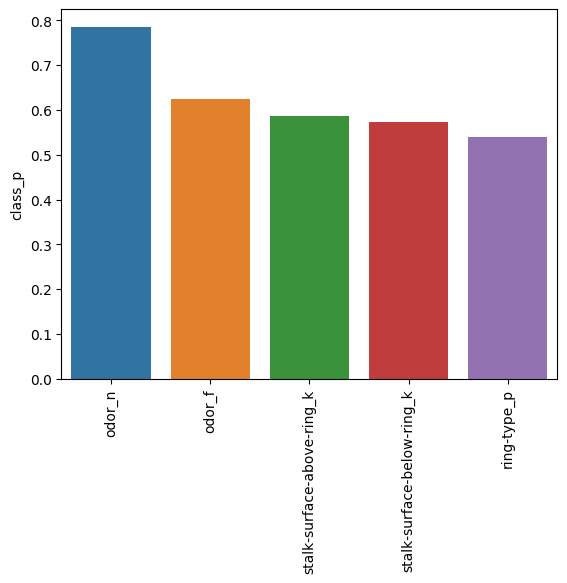


The top 5 features that poisonous mushroom have (according to bar plot + heatmap): 
No odor, foul odor, silky stalk above ring, silky stalk below ring, pendant ring


In [ ]:
# Encode categorical variables as numerical
mushroom_encoded = pd.get_dummies(df)

# Compute correlation matrix
corr_matrix_p = mushroom_encoded.corr()['class_p']

# Sort the correlation values in descending order
sorted_corr_p = corr_matrix_p.abs().sort_values(ascending=False)

# Plot the top 5 correlations in a bar plot
sns.barplot(x=sorted_corr_p.index[2:7], y=sorted_corr_p[2:7])
plt.xticks(rotation=90)
plt.show()

# analysis
print()
print("The top 5 features that poisonous mushroom have (according to bar plot + heatmap): ")
print("No odor, foul odor, silky stalk above ring, silky stalk below ring, pendant ring")


These features align with the useful features we found with the crosstabulation table.

# Examine and compare RFE with EDA to sort out important features for training data set.

From the crosstabulation table, we narrowed down the useful features of determining poisonous mushroom. These include:
1. cap-surface
2. bruises
3. odor
4. gill-size
5. gill-color
6. stalk-surface-above-ring
7. stalk-surface-below-ring
8. ring-type
9. spore-print-color.

From barplot in combination of heatmap, we analysed 5 features that are mostly related to posinous mushroom. These include:
1. odor_n
2. odor_f
3. stalk-surface-above-ring_k
4. stalk-surface-below-ring_k
5. ring-type_p

All these features are proven useful in determining poisonous class by crosstabulation table.

The best features determined by RFE methods are the following:
1. odor_f
2. gill-size_n
3. stalk-color-below-ring_w
4. bruises_f
5. stalk-root_c

The features for stalk-root and stalk-color-below-ring are found not to be effective predictors of the class (poisonous, edible). Therefore, we are going to ignore these 2 features when selecting for training data.

In conclusion, the most important features for training the model include the following:
1. odor_f
2. gill-size_n
3. odor_n
4. stalk-surface-above-ring_k
5. stalk-surface-below-ring_k
6. ring-type_p
7. bruises_f





## Split the dataset again (this time to feed the model with important features)

In [ ]:
selected = df_encoded[['odor_f', 'gill-size_n', 'odor_n', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'ring-type_p', 'bruises_f']]
selected

,odor_f,gill-size_n,odor_n,stalk-surface-above-ring_k,stalk-surface-below-ring_k,ring-type_p,bruises_f
0,0,1,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,1,0,0,0,1,0
4,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...
8119,0,0,1,0,0,1,1
8120,0,0,1,0,0,1,1
8121,0,0,1,0,0,1,1
8122,0,1,0,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
y = df_encoded["class"].values
X = selected.values
y = pd.DataFrame(y)
X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (5686, 7) (5686, 1)
Test Set  : (2438, 7) (2438, 1)


## Model training

### Model 1: Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_hat= lr.predict(X_test)

lrtest = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(lrtest*100))

# check against train set to see overfitting:
# the parameters would put actual values, then the predicted value
# when the difference between train and test > 10% would be overfitting
# underfitting: too simple model, 40%-50% accuracy (considered very bad)
y2_hat= lr.predict(X_train)
lrtrain = accuracy_score(y_train, y2_hat)
print("Accuracy score for the train set={:.2f}%".format(lrtrain*100))

#Check difference to see if it overfits or underfits
print("Difference: = {:.2f}%".format(lrtrain-lrtest))

Accuracy score for the test set=97.74%
Accuracy score for the train set=97.73%
Difference: = -0.00%


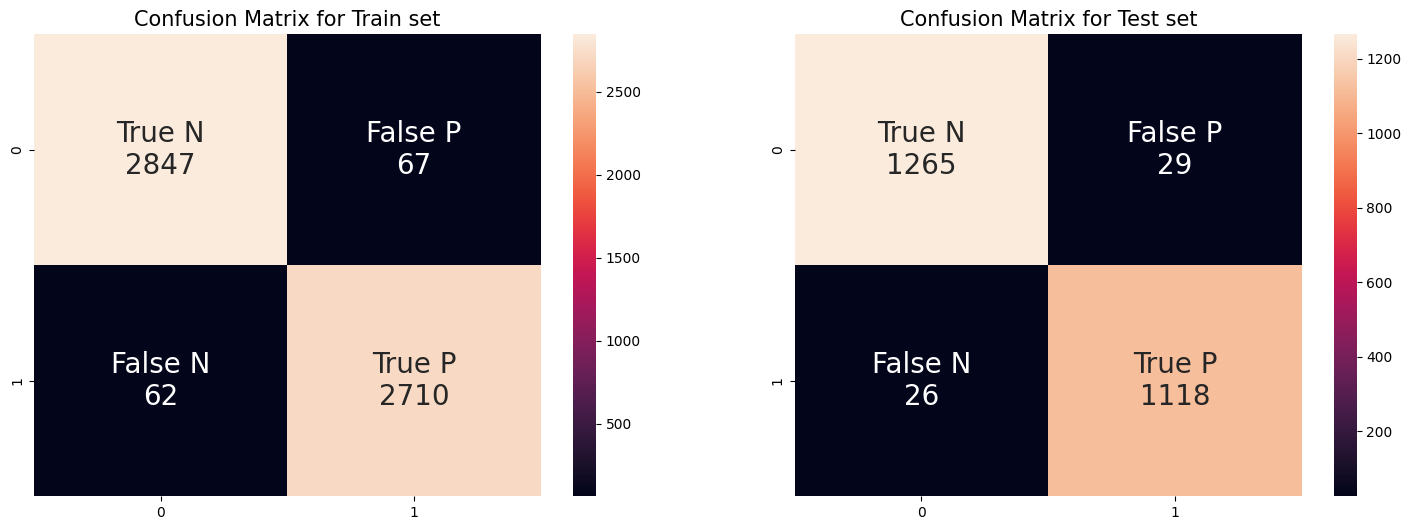

True Positive Rate train: 97.76%	
False Positive Rate train: 2.30%	
True Negative Rate train: 97.70%	
False Negative Rate train: 2.24%	

True Positive Rate test: 97.73%	
False Positive Rate test: 2.24%	
True Negative Rate test: 97.76%	
False Negative Rate test: 2.27%	


In [ ]:
# Logistic Regression
from sklearn.metrics import confusion_matrix

# Plot the Confusion Matrix for Train and then Test
cmtrain2 = confusion_matrix(y_train, y2_hat)
cmtest2 = confusion_matrix(y_test, y_hat)

# Get the labels and data count:
names = ['True N','False P','False N','True P']
ctrain2 = ['{0:0.0f}'.format(value) for value in cmtrain2.flatten()]
ctest2 = ['{0:0.0f}'.format(value) for value in cmtest2.flatten()]
ltrain2 = [f'{v1}\n{v2}' for v1, v2 in zip(names,ctrain2)]
ltest2 = [f'{v1}\n{v2}' for v1, v2 in zip(names,ctest2)]
ltrain2 = np.asarray(ltrain2).reshape(2,2)
ltest2 = np.asarray(ltest2).reshape(2,2)

f, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.heatmap(cmtest2, annot = ltest2, fmt='', annot_kws={"size": 20},
            ax = axes[1]).set_title("Confusion Matrix for Test set", fontsize=15)
sns.heatmap(cmtrain2, annot = ltrain2, fmt='', annot_kws={"size": 20},
            ax = axes[0]).set_title("Confusion Matrix for Train set", fontsize=15)
plt.show()

# show rates - train
tp2train = cmtrain2[1][1]/(sum(cmtrain2[1]))
fp2train = cmtrain2[0][1]/(sum(cmtrain2[0]))
tn2train = cmtrain2[0][0]/(sum(cmtrain2[0]))
fn2train = cmtrain2[1][0]/(sum(cmtrain2[1]))

print("True Positive Rate train: {:.2f}%\t".format(tp2train*100))
print("False Positive Rate train: {:.2f}%\t".format(fp2train*100))
print("True Negative Rate train: {:.2f}%\t".format(tn2train*100))
print("False Negative Rate train: {:.2f}%\t".format(fn2train*100))
print()

# show rates - test
tp2test = cmtest2[1][1]/(sum(cmtest2[1]))
fp2test = cmtest2[0][1]/(sum(cmtest2[0]))
tn2test = cmtest2[0][0]/(sum(cmtest2[0]))
fn2test = cmtest2[1][0]/(sum(cmtest2[1]))

print("True Positive Rate test: {:.2f}%\t".format(tp2test*100))
print("False Positive Rate test: {:.2f}%\t".format(fp2test*100))
print("True Negative Rate test: {:.2f}%\t".format(tn2test*100))
print("False Negative Rate test: {:.2f}%\t".format(fn2test*100))

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = lr.predict_proba(X_test)[:,1]
auclr = roc_auc_score(y_test, y_pred_prob)

# Compute and print AUC score
print("AUC Logistic Regression: {}".format(auclr))

# Compute cross-validated AUC scores: cv_auc
cv_auc_lr = cross_val_score(lr, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc_lr))

AUC Logistic Regression: 0.9848963343457161
AUC scores computed using 5-fold cross-validation: [0.96265    0.99177292 0.95282927 1.         0.9985543 ]


### Model 2: Random Forest

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Get the RandomForestClassifier model and fit in the data
rf = RandomForestClassifier(n_estimators=1, max_depth=50, max_features=3, min_samples_leaf = 3)
rf.fit(X_train, y_train)

y_hat= rf.predict(X_test)

rftest = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(rftest*100))

# check against train set to see overfitting:
# the parameters would put actual values, then the predicted value
# when the difference between train and test > 10% would be overfitting
# underfitting: too simple model, 40%-50% accuracy (considered very bad)
y2_hat= rf.predict(X_train)
rftrain = accuracy_score(y_train, y2_hat)
print("Accuracy score for the train set={:.2f}%".format(rftrain*100))

#Check difference to see if it overfits or underfits
print("Difference: = {:.2f}%".format(rftrain-rftest))

Accuracy score for the test set=97.87%
Accuracy score for the train set=97.82%
Difference: = -0.00%


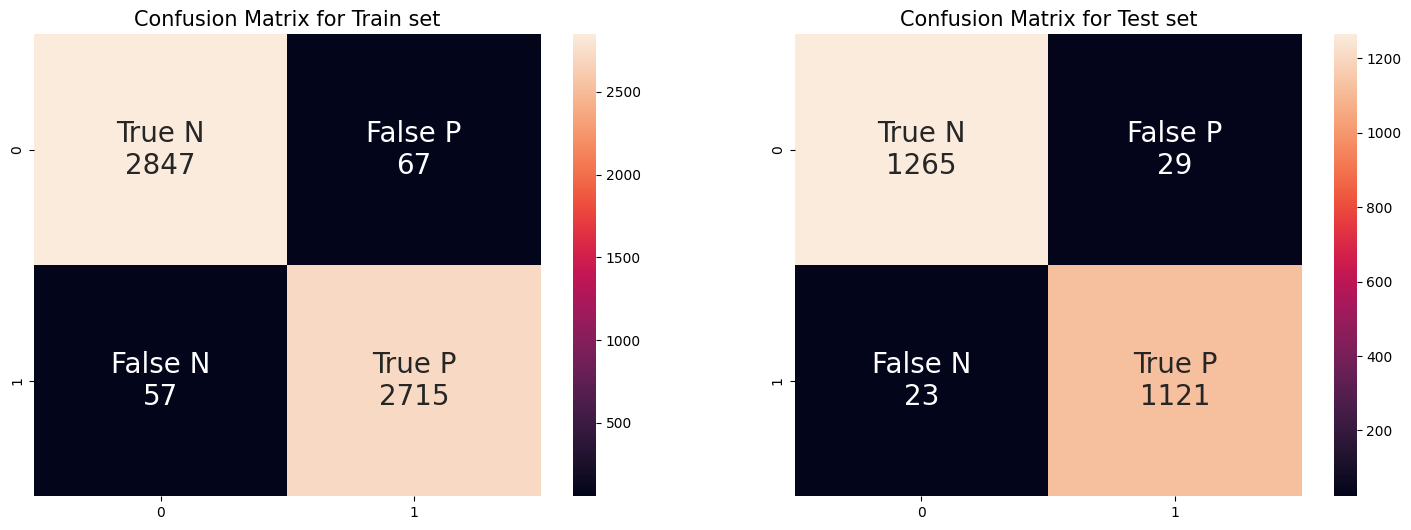

True Positive Rate train: 97.94%	
False Positive Rate train: 2.30%	
True Negative Rate train: 97.70%	
False Negative Rate train: 2.06%	

True Positive Rate test: 97.99%	
False Positive Rate test: 2.24%	
True Negative Rate test: 97.76%	
False Negative Rate test: 2.01%	


In [ ]:
# random forest
from sklearn.metrics import confusion_matrix

# Plot the Confusion Matrix for Train and then Test
cmtrain2 = confusion_matrix(y_train, y2_hat)
cmtest2 = confusion_matrix(y_test, y_hat)

# Get the labels and data count:
names = ['True N','False P','False N','True P']
ctrain2 = ['{0:0.0f}'.format(value) for value in cmtrain2.flatten()]
ctest2 = ['{0:0.0f}'.format(value) for value in cmtest2.flatten()]
ltrain2 = [f'{v1}\n{v2}' for v1, v2 in zip(names,ctrain2)]
ltest2 = [f'{v1}\n{v2}' for v1, v2 in zip(names,ctest2)]
ltrain2 = np.asarray(ltrain2).reshape(2,2)
ltest2 = np.asarray(ltest2).reshape(2,2)

f, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.heatmap(cmtest2, annot = ltest2, fmt='', annot_kws={"size": 20},
            ax = axes[1]).set_title("Confusion Matrix for Test set", fontsize=15)
sns.heatmap(cmtrain2, annot = ltrain2, fmt='', annot_kws={"size": 20},
            ax = axes[0]).set_title("Confusion Matrix for Train set", fontsize=15)
plt.show()

# show rates - train
tp2train = cmtrain2[1][1]/(sum(cmtrain2[1]))
fp2train = cmtrain2[0][1]/(sum(cmtrain2[0]))
tn2train = cmtrain2[0][0]/(sum(cmtrain2[0]))
fn2train = cmtrain2[1][0]/(sum(cmtrain2[1]))

print("True Positive Rate train: {:.2f}%\t".format(tp2train*100))
print("False Positive Rate train: {:.2f}%\t".format(fp2train*100))
print("True Negative Rate train: {:.2f}%\t".format(tn2train*100))
print("False Negative Rate train: {:.2f}%\t".format(fn2train*100))
print()

# show rates - test
tp2test = cmtest2[1][1]/(sum(cmtest2[1]))
fp2test = cmtest2[0][1]/(sum(cmtest2[0]))
tn2test = cmtest2[0][0]/(sum(cmtest2[0]))
fn2test = cmtest2[1][0]/(sum(cmtest2[1]))

print("True Positive Rate test: {:.2f}%\t".format(tp2test*100))
print("False Positive Rate test: {:.2f}%\t".format(fp2test*100))
print("True Negative Rate test: {:.2f}%\t".format(tn2test*100))
print("False Negative Rate test: {:.2f}%\t".format(fn2test*100))

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(X_test)[:,1]
aucrf = roc_auc_score(y_test, y_pred_prob)

# Compute and print AUC score
print("AUC Random Forest: {}".format(aucrf))

# Compute cross-validated AUC scores: cv_auc
cv_auc_rf = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc_rf))

AUC Random Forest: 0.9943313545033019
AUC scores computed using 5-fold cross-validation: [0.83498068 0.99908689 0.96498864 1.         0.95418244]


### Model 3: Support Vector Machines (SVM)

In [ ]:
# Support Vector Machine
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC

# fit a SVM model to the data
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

y_hat= svm.predict(X_test)

svmtest = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(svmtest*100))

# check against train set to see overfitting:
# the parameters would put actual values, then the predicted value
# when the difference between train and test > 10% would be overfitting
# underfitting: too simple model, 40%-50% accuracy (considered very bad)
y2_hat= svm.predict(X_train)
svmtrain = accuracy_score(y_train, y2_hat)
print("Accuracy score for the train set={:.2f}%".format(svmtrain*100))

#Check difference to see if it overfits or underfits
print("Difference: = {:.2f}%".format(svmtrain-svmtest))

Accuracy score for the test set=97.74%
Accuracy score for the train set=97.73%
Difference: = -0.00%


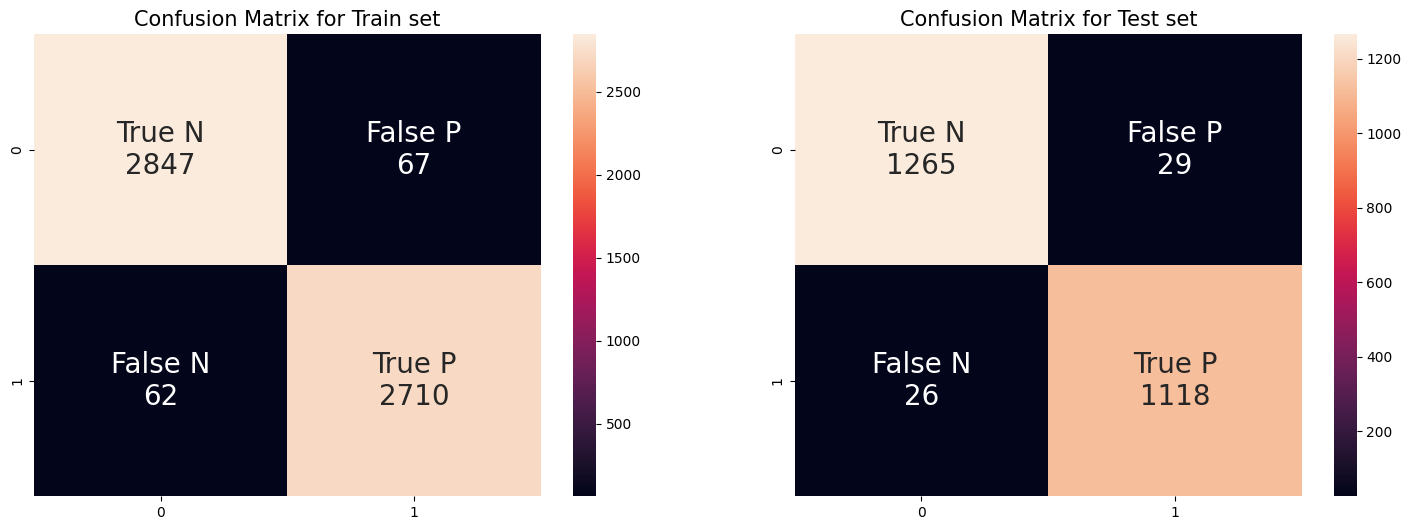

True Positive Rate train: 97.76%	
False Positive Rate train: 2.30%	
True Negative Rate train: 97.70%	
False Negative Rate train: 2.24%	

True Positive Rate test: 97.73%	
False Positive Rate test: 2.24%	
True Negative Rate test: 97.76%	
False Negative Rate test: 2.27%	


In [ ]:
# Logistic Regression
from sklearn.metrics import confusion_matrix

# Plot the Confusion Matrix for Train and then Test
cmtrain2 = confusion_matrix(y_train, y2_hat)
cmtest2 = confusion_matrix(y_test, y_hat)

# Get the labels and data count:
names = ['True N','False P','False N','True P']
ctrain2 = ['{0:0.0f}'.format(value) for value in cmtrain2.flatten()]
ctest2 = ['{0:0.0f}'.format(value) for value in cmtest2.flatten()]
ltrain2 = [f'{v1}\n{v2}' for v1, v2 in zip(names,ctrain2)]
ltest2 = [f'{v1}\n{v2}' for v1, v2 in zip(names,ctest2)]
ltrain2 = np.asarray(ltrain2).reshape(2,2)
ltest2 = np.asarray(ltest2).reshape(2,2)

f, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.heatmap(cmtest2, annot = ltest2, fmt='', annot_kws={"size": 20},
            ax = axes[1]).set_title("Confusion Matrix for Test set", fontsize=15)
sns.heatmap(cmtrain2, annot = ltrain2, fmt='', annot_kws={"size": 20},
            ax = axes[0]).set_title("Confusion Matrix for Train set", fontsize=15)
plt.show()

# show rates - train
tp2train = cmtrain2[1][1]/(sum(cmtrain2[1]))
fp2train = cmtrain2[0][1]/(sum(cmtrain2[0]))
tn2train = cmtrain2[0][0]/(sum(cmtrain2[0]))
fn2train = cmtrain2[1][0]/(sum(cmtrain2[1]))

print("True Positive Rate train: {:.2f}%\t".format(tp2train*100))
print("False Positive Rate train: {:.2f}%\t".format(fp2train*100))
print("True Negative Rate train: {:.2f}%\t".format(tn2train*100))
print("False Negative Rate train: {:.2f}%\t".format(fn2train*100))
print()

# show rates - test
tp2test = cmtest2[1][1]/(sum(cmtest2[1]))
fp2test = cmtest2[0][1]/(sum(cmtest2[0]))
tn2test = cmtest2[0][0]/(sum(cmtest2[0]))
fn2test = cmtest2[1][0]/(sum(cmtest2[1]))

print("True Positive Rate test: {:.2f}%\t".format(tp2test*100))
print("False Positive Rate test: {:.2f}%\t".format(fp2test*100))
print("True Negative Rate test: {:.2f}%\t".format(tn2test*100))
print("False Negative Rate test: {:.2f}%\t".format(fn2test*100))

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = svm.predict_proba(X_test)[:,1]
aucsvm = roc_auc_score(y_test, y_pred_prob)

# Compute and print AUC score
print("AUC SVM: {}".format(aucsvm))

# Compute cross-validated AUC scores: cv_auc
cv_auc_svm = cross_val_score(svm, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc_svm))

AUC SVM: 0.9824914749083992
AUC scores computed using 5-fold cross-validation: [0.96265    0.99615796 0.95271096 1.         0.99942901]


## Comparing the 3 models

In [ ]:
# Based on evaluation score on test set
results = pd.DataFrame({
    # The model names
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'Support Vector Machines'],

    # The evaluation scores of train set
    'Score For train': [lrtrain, rftrain, svmtrain],


    # The evaluation scores of test set
    'Score For test': [lrtest, rftest, svmtest],

    # The scores for AUC
    'AUC scores': [auclr, aucrf, aucsvm],

    # The difference in evaluation scores between test and train set
    'Diff (train-test)': [(lrtrain-lrtest), (rftrain-rftest), (svmtrain-svmtest)],

    # The difference in evaluation scores AUC scores and train set
    'Diff (AUC-train)': [(auclr-lrtrain), (aucrf-rftrain), (aucsvm-svmtrain)],

    # The difference in evaluation scores AUC scores and test set
    'Diff (AUC-test)': [(auclr-lrtest), (aucrf-rftest), (aucsvm-svmtest)]})

# Make a dataframe and parse in values
res = results.sort_values(by='Diff (train-test)', ascending=False)
# Sort by difference and rest index: reset the index without inserting it as a column
res = res.set_index('Diff (train-test)')
res

,Model,Score For train,Score For test,AUC scores,Diff (AUC-train),Diff (AUC-test)
Diff (train-test),,,,,,
-0.000128,Logistic Regression,0.977313,0.977441,0.984896,0.007584,0.007456
-0.000128,Support Vector Machines,0.977313,0.977441,0.982491,0.005179,0.005051
-0.000479,Random Forest Classifier,0.978192,0.978671,0.994331,0.016139,0.015660


## Conclusions/Insights gained

- According to the train scores: Random Forest Classifier performed the best
- According to the test scores: Random forest Classifier performed the best
- According to the difference in test and train scores: Both Logistic Regression and SVM performed the best. However, the difference is less than 1% which is not even close to overfitting, we can still conclude Random Forest performed the best at this point
- According to the AUC scores: Random Forest performed the best
- According to the difference in AUC score and train set: SVM performed the best. Though the difference for Random Forest is the highest, the difference is considered insignificant so it can still be concluded to be the best model among the 3 at this point.
- According to the difference in AUC score and test set: SVM performed the best. Though the difference for Random Forest is the highest, the difference is considered insignificant so it can still be concluded to be the best model among the 3 at this point.
- <b>Therefore, we concluded the Random Forest is the best classifier to classify mushrooms among the 3 classifiers. Users are recommended the use random forest to help verify whether the mushrooms are edible or poisonous. However, users must noot overrely on the model. It is also important for users to treat the model as a reference and double check the mushrooms before consuming</b>
- <b>Also, all 3 have attained a score of around 0.97, which we deem is good enough, we do not need to do ensembling to increase the accuracy.</b>

## Additional Exploration - Hyperparameter tuning via GridSearchCV and RandomizedSearchCV
## Solely extra exploration, not included in resolving problem statement

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation
rf_grid = grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2) # Fit the random search model
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
rfy_hat= rf_grid.predict(X_test)

rf_gridtest = accuracy_score(y_test, rfy_hat)
print("Accuracy score for the test set={:.2f}%".format(rf_gridtest*100))

# check against train set to see overfitting:
# the parameters would put actual values, then the predicted value
# when the difference between train and test > 10% would be overfitting
# underfitting: too simple model, 40%-50% accuracy (considered very bad)
rfy2_hat= rf_grid.predict(X_train)
rf_gridtrain = accuracy_score(y_train, rfy2_hat)
print("Accuracy score for the train set={:.2f}%".format(rf_gridtrain*100))

#Check difference to see if it overfits or underfits
print("Difference: = {:.2f}%".format(rf_gridtrain-rf_gridtest))

Accuracy score for the test set=100.00%
Accuracy score for the train set=100.00%
Difference: = 0.00%


In [ ]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

### RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score
rfy_hat= rf_random.predict(X_test)

rf_randomtest = accuracy_score(y_test, rfy_hat)
print("Accuracy score for the test set={:.2f}%".format(rf_randomtest*100))

# check against train set to see overfitting:
# the parameters would put actual values, then the predicted value
# when the difference between train and test > 10% would be overfitting
# underfitting: too simple model, 40%-50% accuracy (considered very bad)
rfy2_hat= rf_random.predict(X_train)
rf_randomtrain = accuracy_score(y_train, rfy2_hat)
print("Accuracy score for the train set={:.2f}%".format(rf_randomtrain*100))

#Check difference to see if it overfits or underfits
print("Difference: = {:.2f}%".format(rf_randomtrain-rf_randomtest))

Accuracy score for the test set=100.00%
Accuracy score for the train set=100.00%
Difference: = 0.00%


In [ ]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

Both did equally well where they both reach an accuracy score of 100.
<br>
However, if have to compare which does better, randomizedsearchcv did better.
<br>
Why? it took lesser time and try a few combinations and still achieve the same result as gridsearchcv.
<br>
Gridsearchcv uses all combination whereas randomizedsearchcv tries random combinations of a range of values

## Some Explorations

### How is your prediction task defined? And what is the meaning of the output variable?
- Having class as the target, which contain inputs e and p
- Edible = e, Poisonous = p
- To predict whether a mushroom is edible or poisonous with the help of different features to determine them.

### How do you represent your data as features?
- We first differentiate them by their datatypes
- Encode categorical data

### How did you select which learning algorithms to use?
- See if the learning algorithm is suitable for mushroom classification (Classifier learning algorithms)
- Compare them with their default state and choose the best evaluation score for testing set
- Then, the difference evaluation score when testing against train set (closest to 0)

### How do you evaluate the quality of your system?
- Added the accuracy score, but that is not enough.
- We added confusion matrix and the AUC score, to see the true/false postives/negatives.

## References

- Data Prep:
  - https://www.kaggle.com/datasets/uciml/mushroom-classification
  - https://datatofish.com/replace-values-pandas-dataframe/

- EDA:
  - https://www.w3schools.com/python/python_functions.asp
  - https://seaborn.pydata.org/generated/seaborn.barplot.html

- Model Training:
  - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
  - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

- Evaluation:
  - https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
  - https://scikit-learn.org/stable/modules/cross_validation.html

- Additional Exploration:
  - https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
  - https://www.kaggle.com/general/212697